In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt

c:\Users\calag\Desktop\nlp-proyecto7-pc3\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#CARGAMOS EL MODELO BLIP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
c:\Users\calag\Desktop\nlp-proyecto7-pc3\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\calag\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need

In [ ]:
#CARGAMOS LA IMAGEN
image_path = "../samples/dog_mio.png"
image = Image.open(image_path).convert("RGB")

In [ ]:
#PREPROCESAMIENTO + GENERACIÓN
inputs = processor(images=image, return_tensors="pt").to(device)
out = model.generate(**inputs)

In [ ]:
#DECODIFICAR
caption = processor.decode(out[0], skip_special_tokens=True)
print("Caption generado por BLIP:")
print(">>>", caption)

Caption generado por BLIP:
>>> a drawing of a dog with a collar


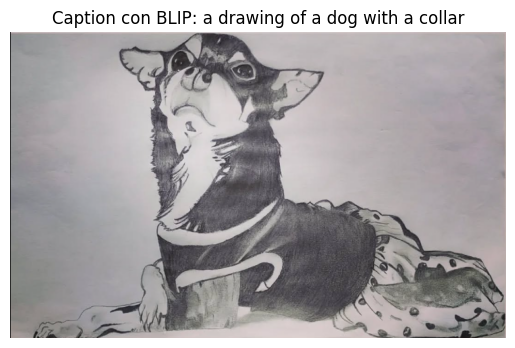

In [ ]:
#MOSTRAR REULTADO
plt.imshow(image)
plt.title(f"Caption con BLIP: {caption}")
plt.axis('off')
plt.show()